In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from tensorflow import keras
from tensorflow.keras import layers, models


In [2]:
df=pd.read_csv('diabetes_dataset.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_100784\658244105.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_100784\3455171128.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='SkinThickness', data=df, palette='Set2')


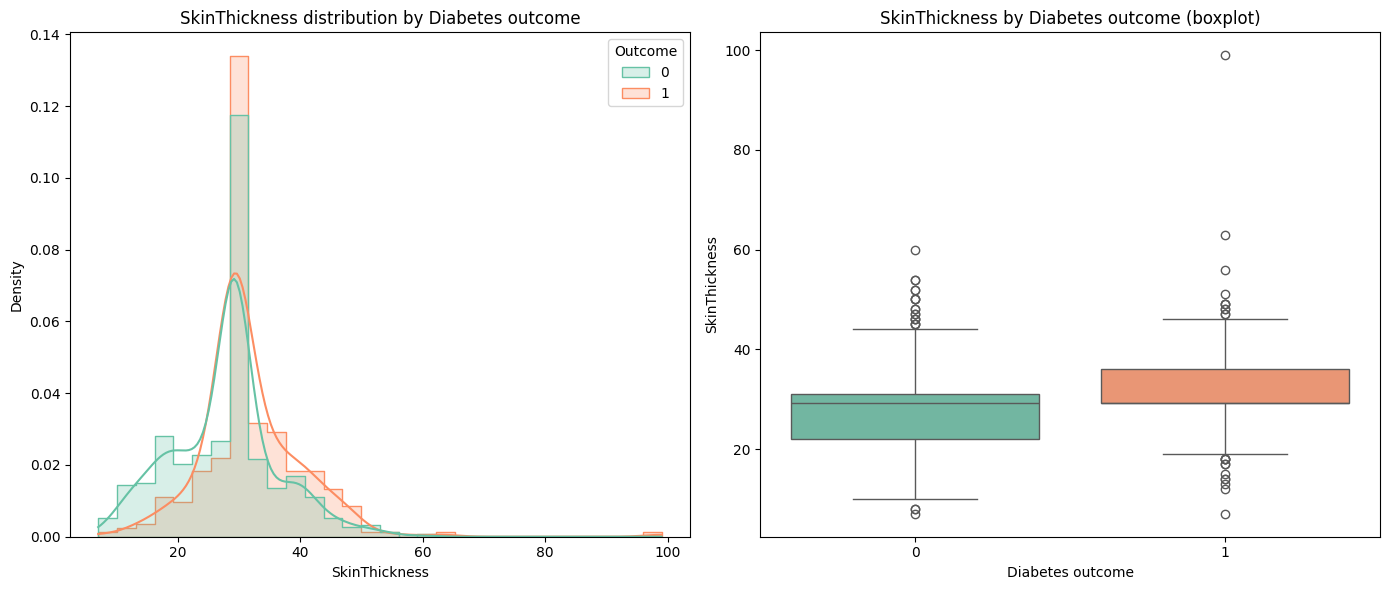

In [5]:

df['SkinThickness'] = df['SkinThickness']


plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(data=df, x='SkinThickness', hue='Outcome', kde=True, element='step', stat='density', common_norm=False, bins=30, palette='Set2')
plt.title('SkinThickness distribution by Diabetes outcome')
plt.xlabel('SkinThickness')
plt.ylabel('Density')

plt.subplot(1,2,2)
sns.boxplot(x='Outcome', y='SkinThickness', data=df, palette='Set2')
plt.title('SkinThickness by Diabetes outcome (boxplot)')
plt.xlabel('Diabetes outcome')
plt.ylabel('SkinThickness')
plt.tight_layout()
plt.show()

In [6]:
df['SkinThickness'].value_counts()

SkinThickness
29.15342    227
32.00000     31
30.00000     27
27.00000     23
23.00000     22
18.00000     20
33.00000     20
28.00000     20
31.00000     19
39.00000     18
19.00000     18
29.00000     17
25.00000     16
40.00000     16
22.00000     16
37.00000     16
26.00000     16
41.00000     15
35.00000     15
36.00000     14
15.00000     14
17.00000     14
20.00000     13
24.00000     12
42.00000     11
13.00000     11
21.00000     10
46.00000      8
34.00000      8
12.00000      7
38.00000      7
16.00000      6
11.00000      6
45.00000      6
14.00000      6
43.00000      6
44.00000      5
10.00000      5
47.00000      4
48.00000      4
49.00000      3
50.00000      3
54.00000      2
8.00000       2
52.00000      2
7.00000       2
60.00000      1
51.00000      1
56.00000      1
63.00000      1
99.00000      1
Name: count, dtype: int64

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00000,0,33.6,0.627,50,1
1,1,85,66,29.00000,0,26.6,0.351,31,0
2,8,183,64,29.15342,0,23.3,0.672,32,1
3,1,89,66,23.00000,94,28.1,0.167,21,0
4,0,137,40,35.00000,168,43.1,2.288,33,1


In [8]:
mini=df['SkinThickness'].min()
maxi=df['SkinThickness'].max()

In [9]:
print(mini, maxi)

7.0 99.0


In [10]:

df['SkinThickness_cat'] = pd.cut(df['SkinThickness'], bins=[mini, 20, 40, maxi], labels=['Low', 'Normal', 'High'],  include_lowest=True)

In [11]:
df['SkinThickness_cat'] .value_counts()

SkinThickness_cat
Normal    570
Low       124
High       74
Name: count, dtype: int64

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_cat
0,6,148,72,35.00000,0,33.6,0.627,50,1,Normal
1,1,85,66,29.00000,0,26.6,0.351,31,0,Normal
2,8,183,64,29.15342,0,23.3,0.672,32,1,Normal
3,1,89,66,23.00000,94,28.1,0.167,21,0,Normal
4,0,137,40,35.00000,168,43.1,2.288,33,1,Normal


In [13]:
df = pd.concat([df, pd.get_dummies(df['SkinThickness_cat'], prefix='SkinThickness').astype(int)], axis=1).drop('SkinThickness_cat', axis=1)


In [14]:
df.drop('SkinThickness', axis=1, inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_Low,SkinThickness_Normal,SkinThickness_High
0,6,148,72,0,33.6,0.627,50,1,0,1,0
1,1,85,66,0,26.6,0.351,31,0,0,1,0
2,8,183,64,0,23.3,0.672,32,1,0,1,0
3,1,89,66,94,28.1,0.167,21,0,0,1,0
4,0,137,40,168,43.1,2.288,33,1,0,1,0


C:\Users\HP\AppData\Local\Temp\ipykernel_100784\656880183.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Age', data=df, palette='Set2')


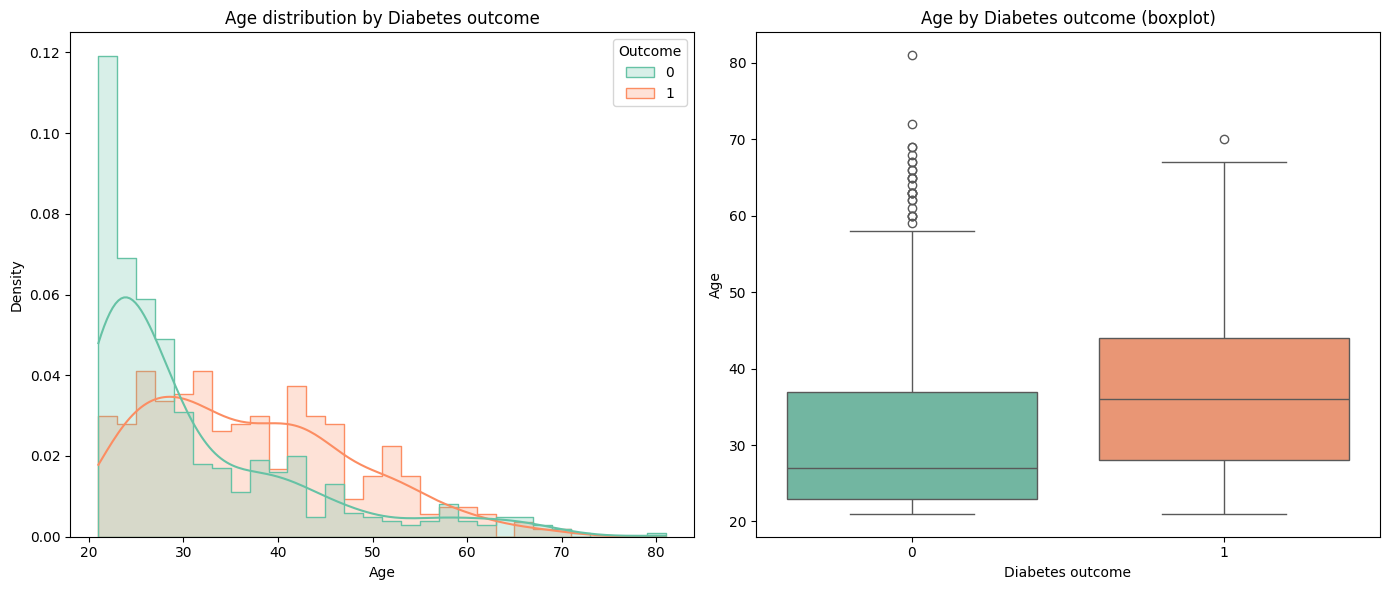

In [15]:

df['Age'] = df['Age']


plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Age', hue='Outcome', kde=True, element='step', stat='density', common_norm=False, bins=30, palette='Set2')
plt.title('Age distribution by Diabetes outcome')
plt.xlabel('Age')
plt.ylabel('Density')

plt.subplot(1,2,2)
sns.boxplot(x='Outcome', y='Age', data=df, palette='Set2')
plt.title('Age by Diabetes outcome (boxplot)')
plt.xlabel('Diabetes outcome')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

In [16]:
df['Age'].value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
36    16
38    16
32    16
45    15
34    14
46    13
40    13
43    13
39    12
35    10
44     8
50     8
51     8
52     8
58     7
54     6
47     6
49     5
60     5
53     5
57     5
48     5
63     4
66     4
55     4
62     4
59     3
56     3
65     3
67     3
61     2
69     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

In [17]:
df['Age'] = pd.cut(df['Age'], bins=[0, 20, 60, 100], labels=['Young', 'Mid Age', 'Senior Citizen'],  include_lowest=True)

In [18]:
df = pd.concat([df, pd.get_dummies(df['Age']).astype(int)], axis=1).drop('Age', axis=1)


In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Outcome,SkinThickness_Low,SkinThickness_Normal,SkinThickness_High,Young,Mid Age,Senior Citizen
0,6,148,72,0,33.6,0.627,1,0,1,0,0,1,0
1,1,85,66,0,26.6,0.351,0,0,1,0,0,1,0
2,8,183,64,0,23.3,0.672,1,0,1,0,0,1,0
3,1,89,66,94,28.1,0.167,0,0,1,0,0,1,0
4,0,137,40,168,43.1,2.288,1,0,1,0,0,1,0


In [20]:
df['BMI'] = df['BMI'].replace(0, np.nan)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_100784\1751362857.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI'].fillna(df['BMI'].mean(), inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_100784\3269672436.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=df, palette='Set2')


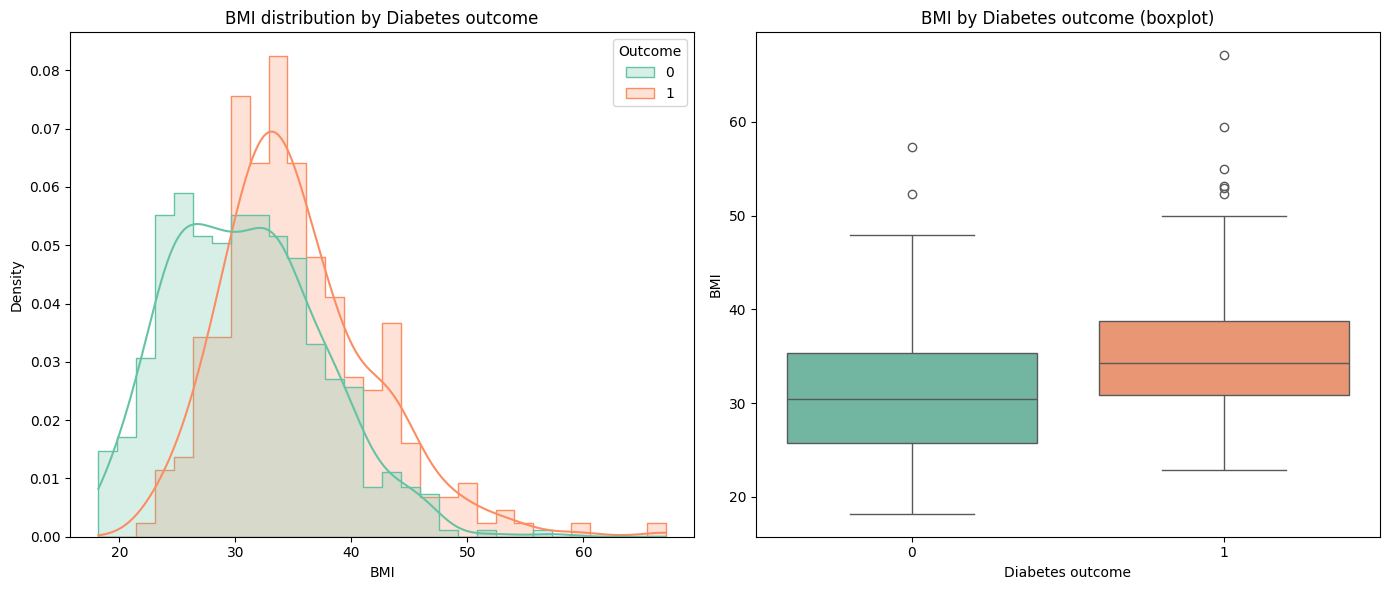

In [21]:

df['BMI'] = df['BMI']


plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(data=df, x='BMI', hue='Outcome', kde=True, element='step', stat='density', common_norm=False, bins=30, palette='Set2')
plt.title('BMI distribution by Diabetes outcome')
plt.xlabel('BMI')
plt.ylabel('Density')

plt.subplot(1,2,2)
sns.boxplot(x='Outcome', y='BMI', data=df, palette='Set2')
plt.title('BMI by Diabetes outcome (boxplot)')
plt.xlabel('Diabetes outcome')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

In [22]:
df['BMI'].max()

np.float64(67.1)

In [23]:
df['BMI'].value_counts()

BMI
32.000000    13
31.600000    12
31.200000    12
32.457464    11
32.400000    10
             ..
49.600000     1
24.100000     1
41.200000     1
49.300000     1
46.300000     1
Name: count, Length: 248, dtype: int64

In [24]:
df['BMI'] = pd.cut(df['BMI'], bins=[18, 24, 70], labels=['Optimal_BMI','Risky_BMI'],  include_lowest=True)

In [25]:
df = pd.concat([df, pd.get_dummies(df['BMI']).astype(int)], axis=1).drop('BMI', axis=1)

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,DiabetesPedigreeFunction,Outcome,SkinThickness_Low,SkinThickness_Normal,SkinThickness_High,Young,Mid Age,Senior Citizen,Optimal_BMI,Risky_BMI
0,6,148,72,0,0.627,1,0,1,0,0,1,0,0,1
1,1,85,66,0,0.351,0,0,1,0,0,1,0,0,1
2,8,183,64,0,0.672,1,0,1,0,0,1,0,1,0
3,1,89,66,94,0.167,0,0,1,0,0,1,0,0,1
4,0,137,40,168,2.288,1,0,1,0,0,1,0,0,1


In [27]:
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_100784\988260981.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)


In [28]:
df['Insulin'].value_counts()

Insulin
155.548223    374
105.000000     11
130.000000      9
140.000000      9
120.000000      8
             ... 
178.000000      1
127.000000      1
510.000000      1
16.000000       1
112.000000      1
Name: count, Length: 186, dtype: int64

Text(0, 0.5, 'Density')

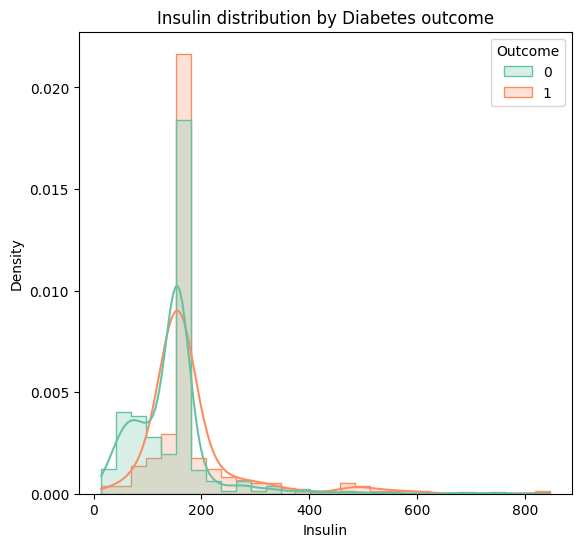

In [29]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Insulin', hue='Outcome', kde=True, element='step', stat='density', common_norm=False, bins=30, palette='Set2')
plt.title('Insulin distribution by Diabetes outcome')
plt.xlabel('Insulin')
plt.ylabel('Density')


In [30]:
maxin=df['Insulin'].max()
minin=df['Insulin'].min()
print(minin, maxin)

14.0 846.0


In [31]:
df['Insulin'] = pd.cut(df['Insulin'], bins=[minin,100,400, maxin], labels=['Low_insulin','Medium_Insulin','High_Insulin'],  include_lowest=True)

In [32]:
df = pd.concat([df, pd.get_dummies(df['Insulin']).astype(int)], axis=1).drop('Insulin', axis=1)

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,DiabetesPedigreeFunction,Outcome,SkinThickness_Low,SkinThickness_Normal,SkinThickness_High,Young,Mid Age,Senior Citizen,Optimal_BMI,Risky_BMI,Low_insulin,Medium_Insulin,High_Insulin
0,6,148,72,0.627,1,0,1,0,0,1,0,0,1,0,1,0
1,1,85,66,0.351,0,0,1,0,0,1,0,0,1,0,1,0
2,8,183,64,0.672,1,0,1,0,0,1,0,1,0,0,1,0
3,1,89,66,0.167,0,0,1,0,0,1,0,0,1,1,0,0
4,0,137,40,2.288,1,0,1,0,0,1,0,0,1,0,1,0


In [34]:
df['BloodPressure'].value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count, dtype: int64

In [35]:
df['BloodPressure'].min()

np.int64(0)

In [36]:
df['BloodPressure'].max()

np.int64(122)

In [37]:
df['BloodPressure'] = pd.cut(df['BloodPressure'], bins=[64,75,130, 180], labels=['Low_Pressure','Normal Pressure','High_Pressure'],  include_lowest=True)

In [38]:
df = pd.concat([df, pd.get_dummies(df['BloodPressure']).astype(int)], axis=1).drop('BloodPressure', axis=1)

In [39]:
df.head()

,Pregnancies,Glucose,DiabetesPedigreeFunction,Outcome,SkinThickness_Low,SkinThickness_Normal,SkinThickness_High,Young,Mid Age,Senior Citizen,Optimal_BMI,Risky_BMI,Low_insulin,Medium_Insulin,High_Insulin,Low_Pressure,Normal Pressure,High_Pressure
0,6,148,0.627,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0
1,1,85,0.351,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0
2,8,183,0.672,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0
3,1,89,0.167,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0
4,0,137,2.288,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0


Text(0, 0.5, 'Density')

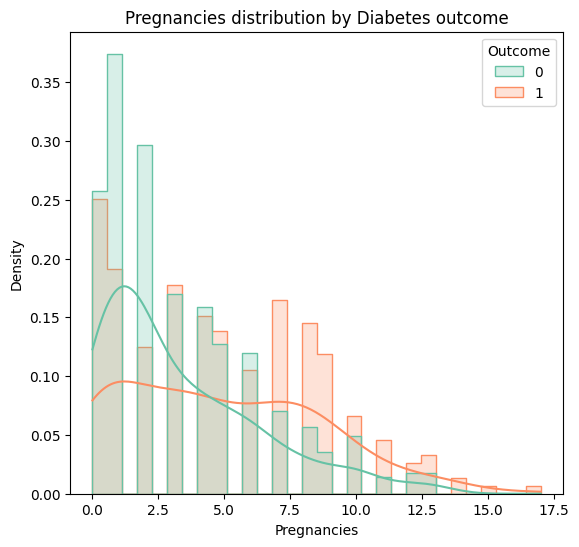

In [40]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Pregnancies', hue='Outcome', kde=True, element='step', stat='density', common_norm=False, bins=30, palette='Set2')
plt.title('Pregnancies distribution by Diabetes outcome')
plt.xlabel('Pregnancies')
plt.ylabel('Density')

In [41]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

In [42]:
df['Pregnancies'].max()

np.int64(17)

In [43]:
df['Pregnancies'] = pd.cut(df['Pregnancies'], bins=[0,6,17], labels=['Normal_count_Pregnancy','Risky_count_Pregnancy'],  include_lowest=True)

In [44]:
df = pd.concat([df, pd.get_dummies(df['Pregnancies']).astype(int)], axis=1).drop('Pregnancies', axis=1)

In [45]:
df.head()

,Glucose,DiabetesPedigreeFunction,Outcome,SkinThickness_Low,SkinThickness_Normal,SkinThickness_High,Young,Mid Age,Senior Citizen,Optimal_BMI,Risky_BMI,Low_insulin,Medium_Insulin,High_Insulin,Low_Pressure,Normal Pressure,High_Pressure,Normal_count_Pregnancy,Risky_count_Pregnancy
0,148,0.627,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0
1,85,0.351,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0
2,183,0.672,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1
3,89,0.167,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0
4,137,2.288,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0


In [46]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_100784\1883647119.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)


In [47]:
df['Glucose'].value_counts()

Glucose
99.0     17
100.0    17
111.0    14
125.0    14
129.0    14
         ..
56.0      1
169.0     1
149.0     1
65.0      1
190.0     1
Name: count, Length: 136, dtype: int64

Text(0, 0.5, 'Density')

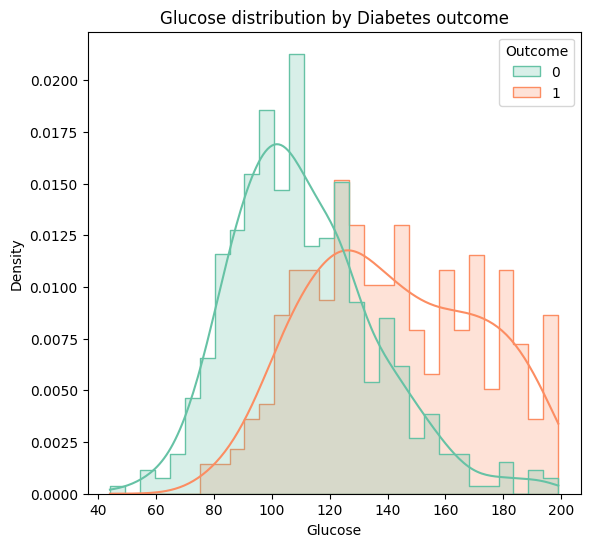

In [48]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Glucose', hue='Outcome', kde=True, element='step', stat='density', common_norm=False, bins=30, palette='Set2')
plt.title('Glucose distribution by Diabetes outcome')
plt.xlabel('Glucose')
plt.ylabel('Density')

In [49]:
df['Glucose'] = pd.cut(df['Glucose'], bins=[40,100,130,200], labels=['Low_Glucose_level','Normal_Glucose_Level','High_Glucose_Level'],  include_lowest=True)

In [50]:
df = pd.concat([df, pd.get_dummies(df['Glucose']).astype(int)], axis=1).drop('Glucose', axis=1)

In [51]:
df.head()

,DiabetesPedigreeFunction,Outcome,SkinThickness_Low,SkinThickness_Normal,SkinThickness_High,Young,Mid Age,Senior Citizen,Optimal_BMI,Risky_BMI,...,Medium_Insulin,High_Insulin,Low_Pressure,Normal Pressure,High_Pressure,Normal_count_Pregnancy,Risky_count_Pregnancy,Low_Glucose_level,Normal_Glucose_Level,High_Glucose_Level
0,0.627,1,0,1,0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1
1,0.351,0,0,1,0,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
2,0.672,1,0,1,0,0,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
3,0.167,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
4,2.288,1,0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,1


Text(0, 0.5, 'Density')

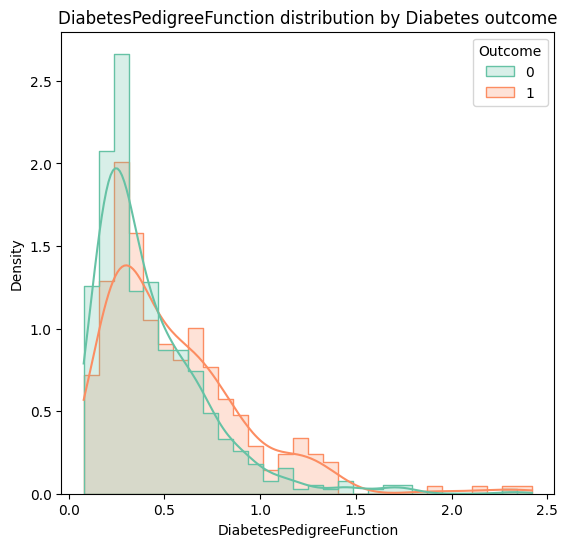

In [52]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(data=df, x='DiabetesPedigreeFunction', hue='Outcome', kde=True, element='step', stat='density', common_norm=False, bins=30, palette='Set2')
plt.title('DiabetesPedigreeFunction distribution by Diabetes outcome')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Density')

In [53]:
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].apply(lambda x: 0 if x <= 0.5 else 1)


In [54]:
df.head()

,DiabetesPedigreeFunction,Outcome,SkinThickness_Low,SkinThickness_Normal,SkinThickness_High,Young,Mid Age,Senior Citizen,Optimal_BMI,Risky_BMI,...,Medium_Insulin,High_Insulin,Low_Pressure,Normal Pressure,High_Pressure,Normal_count_Pregnancy,Risky_count_Pregnancy,Low_Glucose_level,Normal_Glucose_Level,High_Glucose_Level
0,1,1,0,1,0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1
1,0,0,0,1,0,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
2,1,1,0,1,0,0,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
4,1,1,0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,1


In [55]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,     
          
    random_state=42 ,
    stratify=y         
    
)


In [57]:
X_train.shape

(614, 20)

In [58]:
from sklearn.ensemble import RandomForestClassifier


In [59]:
baseline_model=RandomForestClassifier()
baseline_model.fit(X_train,y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
y_pred = baseline_model.predict(X_test)

In [61]:
from sklearn.metrics import classification_report,accuracy_score
print(" Model: Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

 Model: Random Forest Classifier
Accuracy: 0.6818181818181818

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.71      0.74       100
           1       0.54      0.63      0.58        54

    accuracy                           0.68       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.70      0.68      0.69       154



In [64]:

%pip install lightgbm
%pip install catboost
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [65]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Gradient Boosting": GradientBoostingClassifier()
}


In [66]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    results.append({"Model": name, "Accuracy": acc, "F1-score": f1, "ROC-AUC": auc})


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:12:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [68]:
results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)
print("Model Comparison Results:")
print(results_df)

Model Comparison Results:
                 Model  Accuracy  F1-score   ROC-AUC
0  Logistic Regression  0.714286  0.592593  0.784537
1                  SVM  0.714286  0.607143  0.759537
2             CatBoost  0.701299  0.596491  0.757870
3             LightGBM  0.694805  0.584071  0.756574
4    Gradient Boosting  0.688312  0.586207  0.756204
5        Random Forest  0.675325  0.576271  0.736111
6              XGBoost  0.681818  0.608000  0.731204
7        Decision Tree  0.681818  0.573913  0.705185
8                  KNN  0.675325  0.583333  0.704259
